In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
data = pd.read_csv('social_media_mental_health.csv')

In [26]:
df = data.copy()

In [27]:
df.head()

,Gender,Platform,Daily_Screen_Time,Sleep_Score,Anxiety_Level,Depression_Score,Focus_Level
0,Male,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,2,5,5
1,Female,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,5,5,5,4
2,Female,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,5,5,4,4
3,Female,"Facebook, Instagram",More than 5 hours,2,5,4,3
4,Female,"Facebook, Instagram, YouTube",Between 2 and 3 hours,1,5,4,5


In [29]:
df['Gender'].value_counts()

Gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [30]:
df['Gender'].value_counts()

Gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [31]:
valid_genders = ['Male', 'Female']

df['Gender'] = df['Gender'].apply(lambda x: x if x in valid_genders else 'unknown')

df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'unknown'



In [32]:
df['Gender'].value_counts()

Gender
Female     263
Male       211
unknown      7
Name: count, dtype: int64

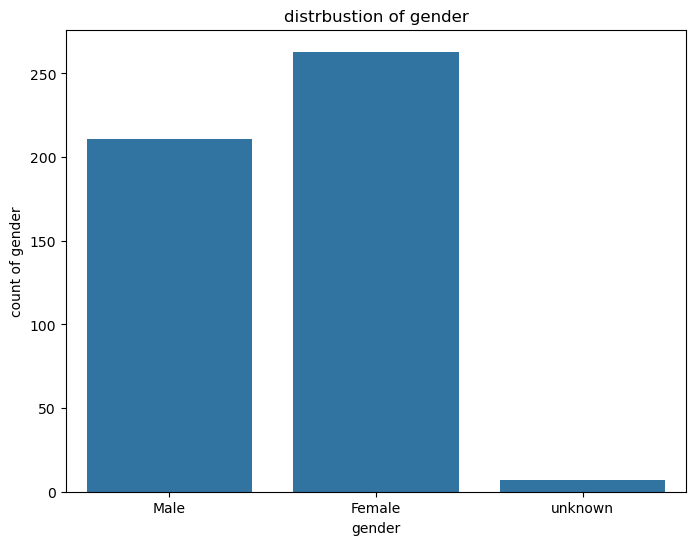

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Gender')
plt.title('distrbustion of gender')
plt.xlabel('gender')
plt.ylabel('count of gender')
plt.show()

In [34]:

df['Platform_List'] = df['Platform'].str.split(', ')

platform_data = []

for idx, row in df.iterrows():
    platforms = row['Platform_List']
    for platform in platforms:
        platform_data.append({
            'Platform': platform.strip(),
            'Focus_Level': row['Focus_Level'],
            'Anxiety_Level': row['Anxiety_Level'],
            'Sleep_Score': row['Sleep_Score'],
            'Gender': row['Gender']
        })

platform_df = pd.DataFrame(platform_data)

platform_stats = platform_df.groupby('Platform').agg({
    'Focus_Level': ['mean', 'count'],
    'Anxiety_Level': ['mean', 'count'],
    'Sleep_Score': ['mean', 'count']
}).round(2)

print("avg value for each platform")
print(platform_stats)

avg value for each platform
          Focus_Level       Anxiety_Level       Sleep_Score      
                 mean count          mean count        mean count
Platform                                                         
Discord          3.40   198          3.75   198        3.40   198
Facebook         3.28   407          3.61   407        3.25   407
Instagram        3.39   359          3.75   359        3.30   359
Pinterest        3.17   145          3.72   145        3.41   145
Reddit           3.30   126          3.73   126        3.23   126
Snapchat         3.51   181          3.84   181        3.46   181
TikTok           3.66    94          4.03    94        3.57    94
Twitter          3.16   131          3.68   131        3.21   131
YouTube          3.24   412          3.60   412        3.22   412


In [40]:
df.head()

,Gender,Platform,Daily_Screen_Time,Sleep_Score,Anxiety_Level,Depression_Score,Focus_Level,Platform_List,has_Facebook,has_Instagram,has_Twitter,has_YouTube,has_Snapchat,has_TikTok,has_Discord,has_Reddit,has_Pinterest
0,Male,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,2,5,5,"[Facebook, Twitter, Instagram, YouTube, Discor...",1,1,1,1,0,0,1,1,0
1,Female,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,5,5,5,4,"[Facebook, Twitter, Instagram, YouTube, Discor...",1,1,1,1,0,0,1,1,0
2,Female,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,5,5,4,4,"[Facebook, Instagram, YouTube, Pinterest]",1,1,0,1,0,0,0,0,1
3,Female,"Facebook, Instagram",More than 5 hours,2,5,4,3,"[Facebook, Instagram]",1,1,0,0,0,0,0,0,0
4,Female,"Facebook, Instagram, YouTube",Between 2 and 3 hours,1,5,4,5,"[Facebook, Instagram, YouTube]",1,1,0,1,0,0,0,0,0


In [37]:
platforms = ['Facebook', 'Instagram', 'Twitter', 'YouTube', 'Snapchat', 
             'TikTok', 'Discord', 'Reddit', 'Pinterest']

for platform in platforms:
    df[f'has_{platform}'] = df['Platform'].apply(lambda x: 1 if platform in x else 0)

correlation_matrix = df[['Focus_Level', 'Anxiety_Level', 'Sleep_Score'] + 
                       [f'has_{p}' for p in platforms]].corr()

print("Correlation matrix between platforms and variables:")
print(correlation_matrix.loc[['Focus_Level', 'Anxiety_Level', 'Sleep_Score'], 
                             [f'has_{p}' for p in platforms]])

Correlation matrix between platforms and variables:
               has_Facebook  has_Instagram  has_Twitter  has_YouTube  \
Focus_Level        0.056324       0.180839    -0.038651    -0.009135   
Anxiety_Level      0.087126       0.250572     0.057331     0.081369   
Sleep_Score        0.082572       0.113241     0.001862     0.028088   

               has_Snapchat  has_TikTok  has_Discord  has_Reddit  \
Focus_Level        0.154973    0.151713     0.098654    0.024909   
Anxiety_Level      0.169965    0.181704     0.126101    0.079421   
Sleep_Score        0.136666    0.125837     0.115936    0.011627   

               has_Pinterest  
Focus_Level        -0.035591  
Anxiety_Level       0.084490  
Sleep_Score         0.095441  


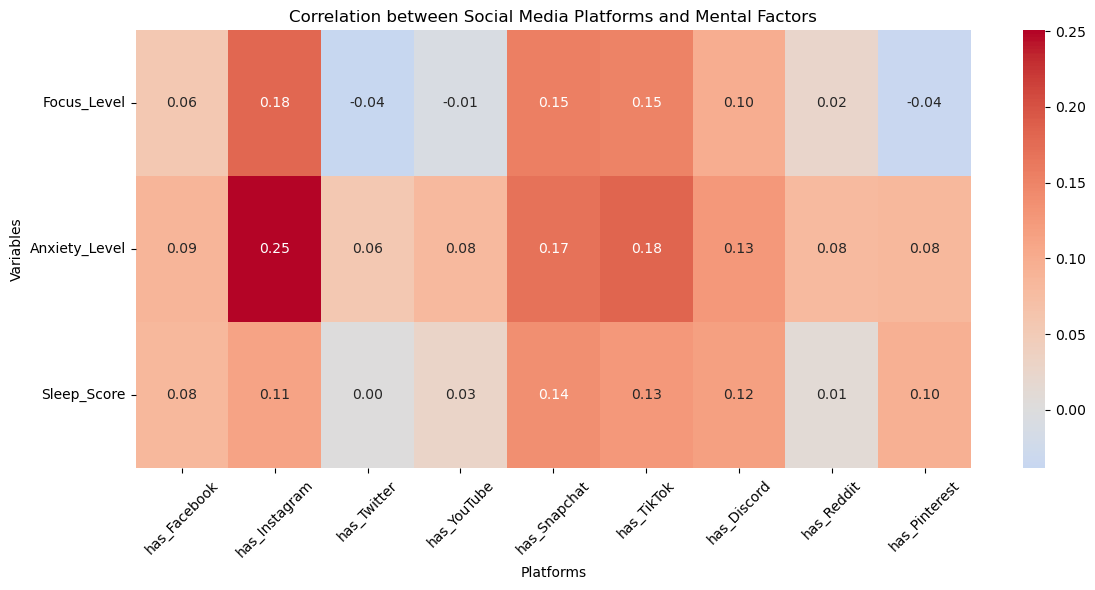

In [38]:


plt.figure(figsize=(12, 6))

sns.heatmap(
    correlation_matrix.loc[
        ['Focus_Level', 'Anxiety_Level', 'Sleep_Score'],
        [f'has_{p}' for p in platforms]
    ],
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)

plt.title('Correlation between Social Media Platforms and Mental Factors')
plt.xlabel('Platforms')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             481 non-null    object
 1   Platform           481 non-null    object
 2   Daily_Screen_Time  481 non-null    object
 3   Sleep_Score        481 non-null    int64 
 4   Anxiety_Level      481 non-null    int64 
 5   Depression_Score   481 non-null    int64 
 6   Focus_Level        481 non-null    int64 
 7   Platform_List      481 non-null    object
 8   has_Facebook       481 non-null    int64 
 9   has_Instagram      481 non-null    int64 
 10  has_Twitter        481 non-null    int64 
 11  has_YouTube        481 non-null    int64 
 12  has_Snapchat       481 non-null    int64 
 13  has_TikTok         481 non-null    int64 
 14  has_Discord        481 non-null    int64 
 15  has_Reddit         481 non-null    int64 
 16  has_Pinterest      481 non-null    int64 
dt

In [42]:
platform_cols = [
    'has_Facebook', 'has_Instagram', 'has_Twitter',
    'has_YouTube', 'has_Snapchat', 'has_TikTok',
    'has_Discord', 'has_Reddit', 'has_Pinterest'
]

platform_usage = df[platform_cols].sum()

print("Platform usage count:")
print(platform_usage.sort_values(ascending=False))


Platform usage count:
has_YouTube      412
has_Facebook     407
has_Instagram    359
has_Discord      198
has_Snapchat     181
has_Pinterest    145
has_Twitter      131
has_Reddit       126
has_TikTok        94
dtype: int64
